# Tech challenge - Grupo 9 - É chikungunya?

## Sobre


### Dicionario de dados das colunas utilizadas

[Link detalhado](./dicionario_dados_colunas_utilizadas.md)


### Variáveis:

- df_original: valor do dataframe sem modificação
- df: valor do dataframe modificado ao longo dos blocos
- cols_sintomas: nomes de colunas relacionadas a sintomas
- cols_comorbidades: nomes de colunas relacionadas a sintomas 
- cols_exames: nomes de colunas relacionadas a exame
- col_target: nome da coluna target
- colunas_selecionada: soma de todas as colunas

### Links Úteis

- [Informações sobre a de dados](https://dadosabertos.saude.gov.br/dataset/arboviroses-febre-de-chikungunya)
- [Dicionário de dados](./dic_dados_chikungunya.pdf)
- [Base de dados 2025](./dados/CHIKBR25.csv)


## Requisitos

In [604]:
! pip install -r requirements.txt

## Importações e configurações

In [605]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [606]:
df_original = pd.read_csv("./dados/CHIKBR25.csv")
df_original.head()

C:\Users\aninh\AppData\Local\Temp\ipykernel_27880\2247410492.py:1: DtypeWarning: Columns (22,50,52,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv("./dados/CHIKBR25.csv")


,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_CHIK_S1,DT_CHIK_S2,DT_PRNT,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,CLASSI_FIN,CRITERIO,DOENCA_TRA,CLINC_CHIK,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_ABDOM,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ,DT_ALRM,GRAV_PULSO,GRAV_CONV,GRAV_ENCH,GRAV_INSUF,GRAV_TAQUI,GRAV_EXTRE,GRAV_HIPOT,GRAV_HEMAT,GRAV_MELEN,GRAV_METRO,GRAV_SANG,GRAV_AST,GRAV_MIOC,GRAV_CONSC,GRAV_ORGAO,DT_GRAV,MANI_HEMOR,EPISTAXE,GENGIVO,METRO,PETEQUIAS,HEMATURA,SANGRAM,LACO_N,PLASMATICO,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,NU_LOTE_I,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,CS_FLXRET,FLXRECEBI,MIGRADO_W
0,2,A920,2024-12-30,202501,2024,32,320060,32001.00,2449218.00,2024-12-30,202501,1989.00,4035,F,5.00,1,6.00,32,320060.00,32001.00,1,2024-12-30,10001.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,4.00,NaN,4.00,NaN,4.00,NaN,NaN,NaN,2.00,NaN,NaN,NaN,1.00,NaN,NaN,NaN,5.00,1.00,NaN,NaN,9.00,NaN,2025-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-30,NaN,NaN,NaN
1,2,A920,2024-12-30,202501,2024,32,320405,32003.00,2484536.00,2024-12-29,202501,1980.00,4044,M,5.00,4,9.00,32,320405.00,32003.00,1,2024-12-30,10001.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-30,1.00,NaN,NaN,NaN,2.00,NaN,NaN,NaN,1.00,NaN,NaN,NaN,13.00,1.00,NaN,NaN,1.00,NaN,2025-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-30,NaN,NaN,NaN
2,2,A920,2024-12-30,202501,2024,32,320130,32002.00,2494450.00,2024-12-29,202501,1996.00,4028,M,6.00,4,9.00,32,320130.00,32002.00,1,2024-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN,2.00,NaN,NaN,NaN,1.00,NaN,NaN,NaN,5.00,1.00,NaN,NaN,9.00,NaN,2025-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-30,NaN,NaN,NaN
3,2,A920,2024-12-30,202501,2024,32,320130,32002.00,2494450.00,2024-12-29,202501,1979.00,4045,F,5.00,1,9.00,32,320130.00,32002.00,1,2024-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN,2.00,NaN,NaN,NaN,1.00,NaN,NaN,NaN,5.00,1.00,NaN,NaN,9.00,NaN,2025-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-30,NaN,NaN,NaN
4,2,A920,2024-12-30,202501,2024,32,320130,32002.00,2494450.00,2024-12-29,202501,2008.00,4016,F,5.00,4,9.00,32,320130.00,32002.00,1,2024-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN,2.00,NaN,NaN,NaN,1.00,NaN,NaN,NaN,5.00,1.00,NaN,NaN,9.00,NaN,2025-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-30,NaN,N

## Análise Exploratória de Dados (EDA)

In [607]:
# Quantidade de linhas e colunas
df_original.shape

(248541, 122)

In [608]:
# Analisando as informações do dataset
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248541 entries, 0 to 248540
Columns: 122 entries, TP_NOT to MIGRADO_W
dtypes: float64(94), int64(10), object(18)
memory usage: 231.3+ MB


### Separando colunas da base de dados referentes a sintomas, comorbidades e exames que possam fazer sentido para o treinamento

In [ ]:
cols_sintomas = [
		'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS',
		'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA', 'LACO',
		'DOR_RETRO'
]

cols_comorbidades = [
		'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA',
		'ACIDO_PEPT', 'AUTO_IMUNE', 
]

cols_exames = [
		'HISTOPA_N', 'IMUNOH_N'
]

col_target = [
		'CLASSI_FIN'
]

df_original['MES_NOTIF'] = pd.to_datetime(df_original['DT_NOTIFIC']).dt.month

# Colunas adicionais para análise de contexto e fatores demográficos
colunas_adicionais = ['NU_IDADE_N', 'UF', 'MES_NOTIF', 'CS_SEXO', 'ALRM_HIPOT']

colunas_selecionadas = cols_sintomas + cols_comorbidades + cols_exames + colunas_adicionais + col_target
df = df_original[colunas_selecionadas].copy()

df

,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,HISTOPA_N,IMUNOH_N,NU_IDADE_N,SG_UF_NOT,MES_NOTIF,CS_SEXO,CLASSI_FIN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4035,32,12,F,5.00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4044,32,12,M,13.00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4028,32,12,M,5.00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4045,32,12,F,5.00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4016,32,12,F,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4052,17,12,M,NaN
248537,2.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,NaN,NaN,4025,17,12,M,13.00
248538,1.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,NaN,NaN,4025,17,12,F,13.00
248539,1.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,1.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,NaN,NaN,4076,17,12,F,13.00


In [610]:
df.shape

(248541, 28)

In [611]:
df["NU_IDADE_N"].value_counts()

NU_IDADE_N
4030    4528
4029    4486
4025    4436
4028    4421
4042    4392
        ... 
4829       1
4404       1
4114       1
2033       1
3045       1
Name: count, Length: 174, dtype: int64

In [612]:
# Tratamento do campo idade

def converter_idade(idade):
    if pd.isna(idade): return 0
    if idade >= 4000: return idade - 4000 # Anos
    if idade >= 3000: return (idade - 3000) / 12 # Meses convertido para anos
    if idade >= 2000: return (idade - 2000) / 365 # Dias convertido para anos
    return 0

df['IDADE_REAL'] = df['NU_IDADE_N'].apply(converter_idade)

df = df.drop(columns=['NU_IDADE_N'])

df['IDADE_REAL'].value_counts()



IDADE_REAL
30.00     4528
29.00     4486
25.00     4438
28.00     4421
42.00     4392
          ... 
829.00       1
404.00       1
114.00       1
0.09         1
3.75         1
Name: count, Length: 170, dtype: int64

In [613]:
# Criar Faixas Etárias 
def categorizar_idade(idade):
    if idade <= 12: return 0  # Criança
    if idade <= 18: return 1  # Adolescente
    if idade <= 60: return 2  # Adulto
    return 3                  # Idoso (Grupo de risco para Chikungunya)

df['FAIXA_ETARIA'] = df['IDADE_REAL'].apply(categorizar_idade)

df = df.drop(columns=['IDADE_REAL'])

df['FAIXA_ETARIA'].value_counts()

FAIXA_ETARIA
2    163670
3     34684
0     30626
1     19561
Name: count, dtype: int64

In [614]:
# Analisando as informações do dataset da colunas selecionadas
df.describe()

,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,HISTOPA_N,IMUNOH_N,SG_UF_NOT,MES_NOTIF,CLASSI_FIN,FAIXA_ETARIA
count,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,238596.00,159.00,160.00,248541.00,248541.00,226680.00,248541.00
mean,1.15,1.18,1.23,1.86,1.77,1.62,1.64,1.96,1.79,1.49,1.92,1.98,1.98,1.74,1.95,1.99,1.99,1.99,1.88,2.00,1.99,3.99,3.98,39.49,4.51,8.82,1.81
std,0.36,0.39,0.42,0.35,0.42,0.49,0.48,0.20,0.41,0.50,0.27,0.15,0.13,0.44,0.23,0.07,0.07,0.07,0.33,0.07,0.09,0.16,0.18,12.27,2.74,4.00,0.82
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,11.00,1.00,5.00,0.00
25%,1.00,1.00,1.00,2.00,2.00,1.00,1.00,2.00,2.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,4.00,4.00,31.00,2.00,5.00,2.00
50%,1.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,4.00,4.00,41.00,4.00,5.00,2.00
75%,1.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,4.00,4.00,51.00,6.00,13.00,2.00
max,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,4.00,4.00,53.00,12.00,13.00,3.00


### Análise e tratamento de Valores Nulos
#### Visualização de valores preenchidos

<Axes: >

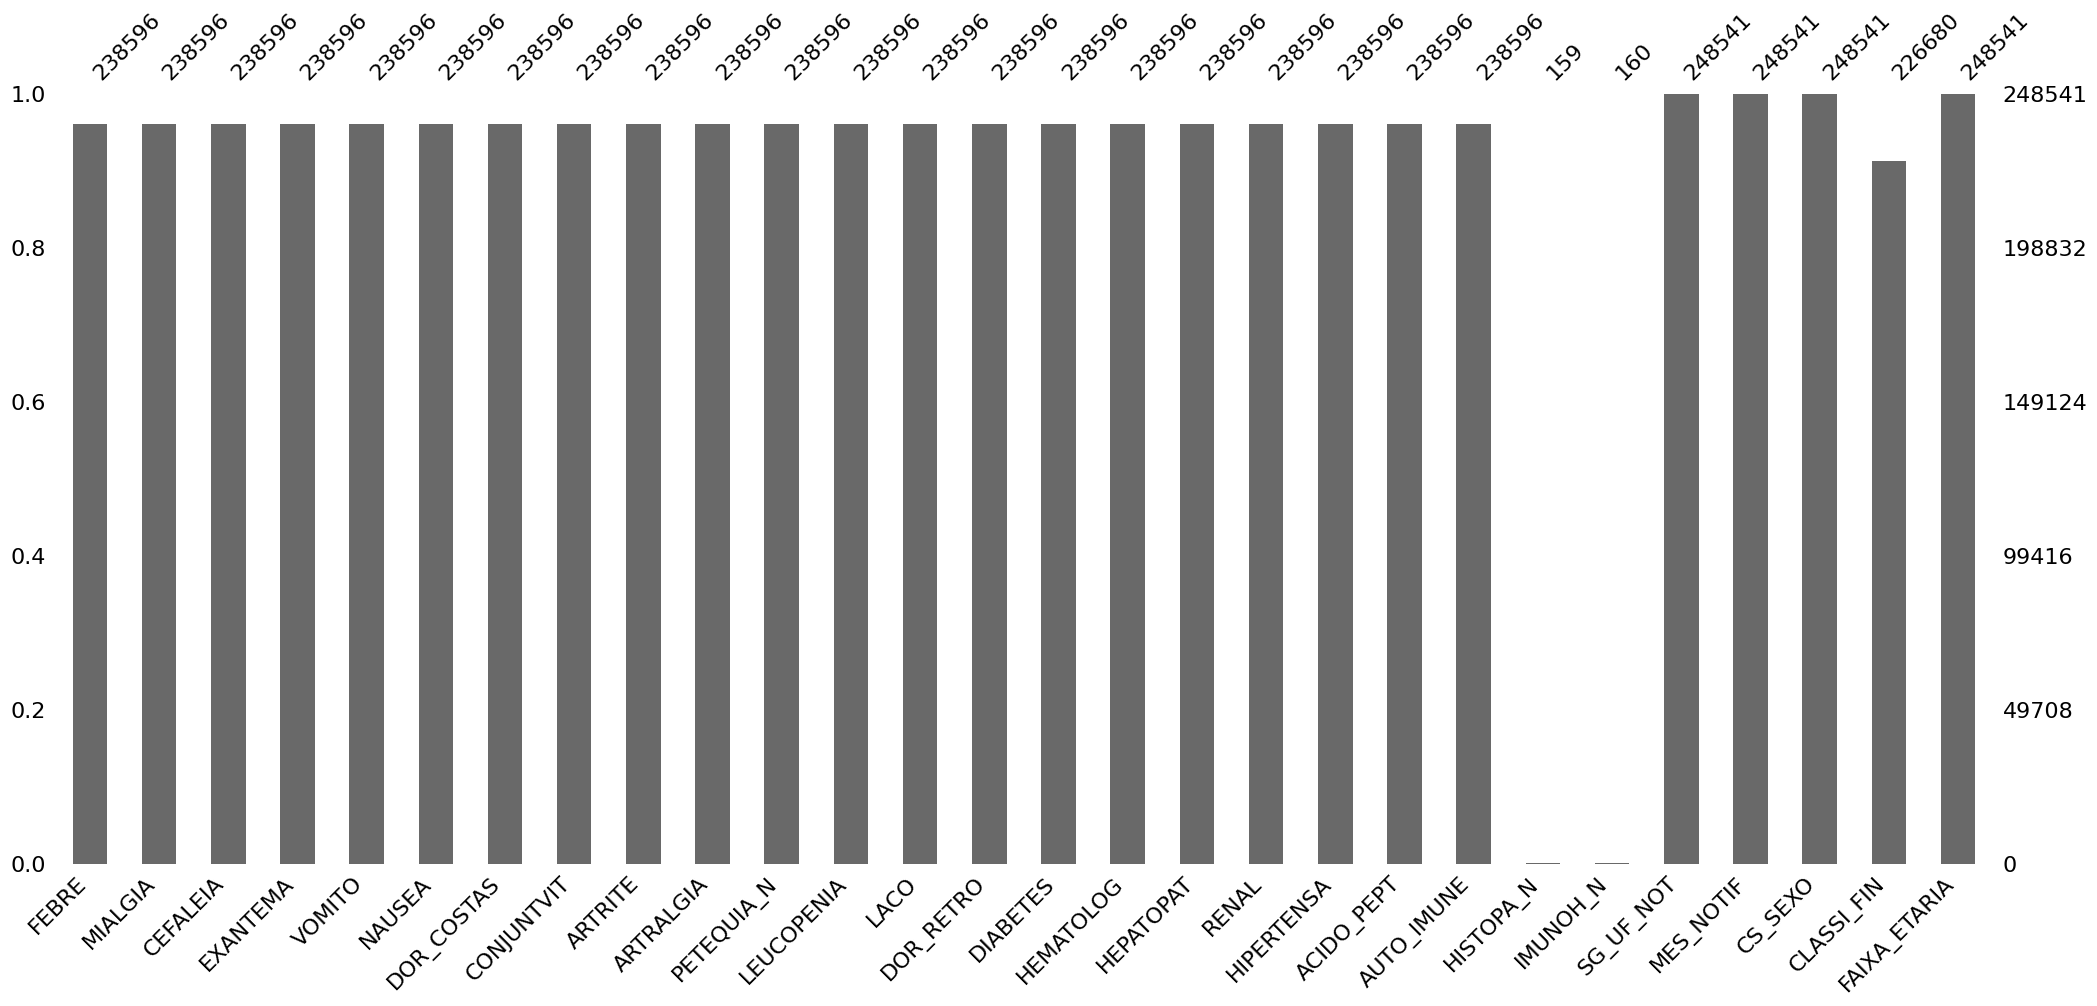

In [615]:
msno.bar(df)

#### Verificação completa do DataFrame

In [616]:
print("=== VERIFICAÇÃO DO DATAFRAME ===")
print(f"df.shape: {df.shape}")
print(f"Número de colunas (len(df.columns)): {len(df.columns)}")

# Se o número de colunas não der 24, clica em Run All. Provavelmente o notebook estava em um 
# estado inconsistente antes (células executadas em ordem diferente ou DataFrame modificado)

=== VERIFICAÇÃO DO DATAFRAME ===
df.shape: (248541, 28)
Número de colunas (len(df.columns)): 28


In [617]:
# Remover colunas com mais de 99% de valores nulos
null_ratio = df.isnull().mean()
null_threshold = 0.99

# Debug: mostrar proporção de nulos das duas colunas de exames
print("\nVerificação das colunas de exames:")
print(f"HISTOPA_N: {null_ratio['HISTOPA_N']:.4f} ({null_ratio['HISTOPA_N']*100:.2f}% nulos)")
print(f"IMUNOH_N: {null_ratio['IMUNOH_N']:.4f} ({null_ratio['IMUNOH_N']*100:.2f}% nulos)")

# Identificar colunas que serão removidas
colunas_para_remover = null_ratio[null_ratio >= null_threshold].index.tolist()
print(f"\nColunas que serão removidas (>= {null_threshold*100}% nulos): {colunas_para_remover}")
print(f"Total de colunas a remover: {len(colunas_para_remover)}")

# Remover colunas com mais de 70% de valores nulos
df = df.loc[:, df.isnull().mean() < null_threshold]

print(f"\nApós remoção por nulos: {df.shape}")


Verificação das colunas de exames:
HISTOPA_N: 0.9994 (99.94% nulos)
IMUNOH_N: 0.9994 (99.94% nulos)

Colunas que serão removidas (>= 99.0% nulos): ['HISTOPA_N', 'IMUNOH_N']
Total de colunas a remover: 2

Após remoção por nulos: (248541, 26)


<Axes: >

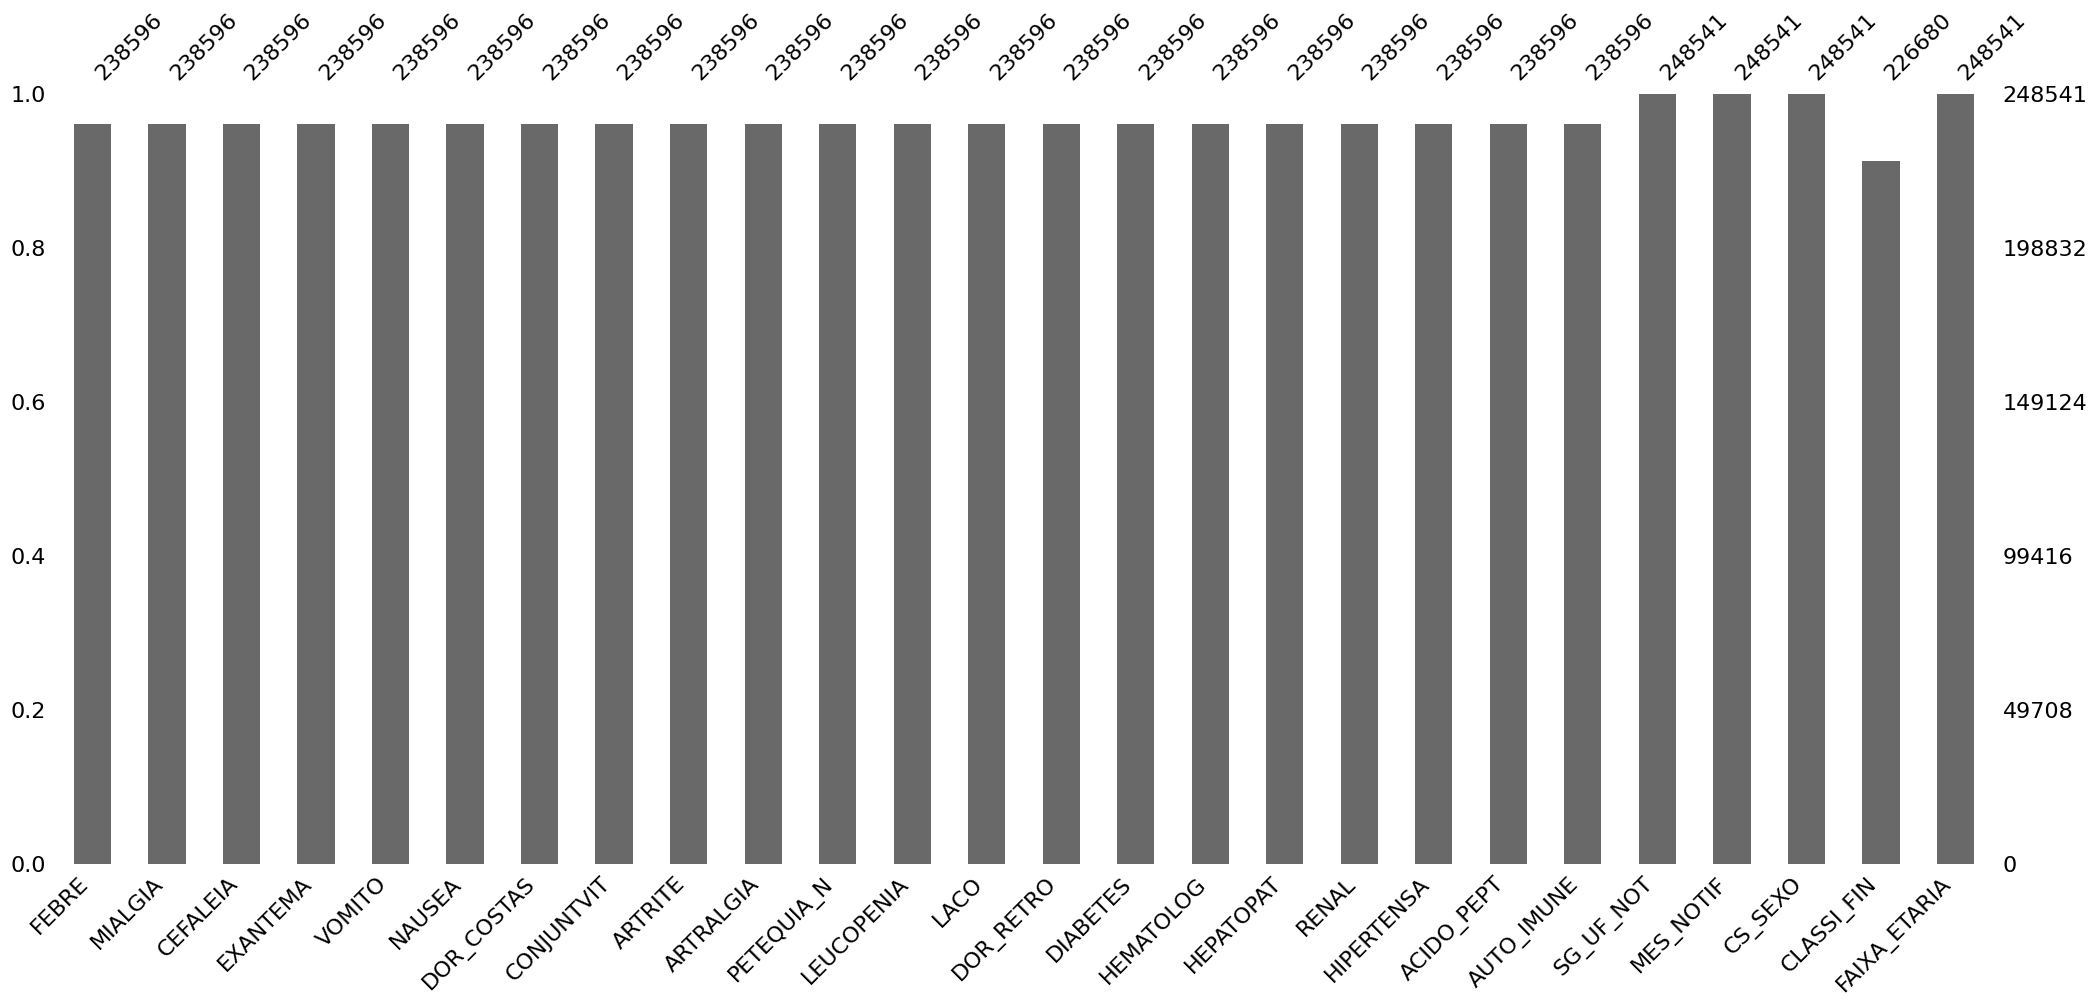

In [618]:
msno.bar(df)

#### Removendo linhas que possuem a "CLASSI_FIN" null, essa é a nossa váriavel alvo

In [619]:
linhas_com_nulo = df["CLASSI_FIN"].isnull().sum()
print(f"Excluir {linhas_com_nulo} linhas nulas em CLASSI_FIN")

# Removendo as linhas nulas
df = df[df["CLASSI_FIN"].notnull()]
linhas_depois = df.shape[0]

Excluir 21861 linhas nulas em CLASSI_FIN


In [620]:
# Colunas com valores nulos

df.isnull().sum()

FEBRE           5844
MIALGIA         5844
CEFALEIA        5844
EXANTEMA        5844
VOMITO          5844
NAUSEA          5844
DOR_COSTAS      5844
CONJUNTVIT      5844
ARTRITE         5844
ARTRALGIA       5844
PETEQUIA_N      5844
LEUCOPENIA      5844
LACO            5844
DOR_RETRO       5844
DIABETES        5844
HEMATOLOG       5844
HEPATOPAT       5844
RENAL           5844
HIPERTENSA      5844
ACIDO_PEPT      5844
AUTO_IMUNE      5844
SG_UF_NOT          0
MES_NOTIF          0
CS_SEXO            0
CLASSI_FIN         0
FAIXA_ETARIA       0
dtype: int64

In [621]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226680 entries, 0 to 248539
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   FEBRE         220836 non-null  float64
 1   MIALGIA       220836 non-null  float64
 2   CEFALEIA      220836 non-null  float64
 3   EXANTEMA      220836 non-null  float64
 4   VOMITO        220836 non-null  float64
 5   NAUSEA        220836 non-null  float64
 6   DOR_COSTAS    220836 non-null  float64
 7   CONJUNTVIT    220836 non-null  float64
 8   ARTRITE       220836 non-null  float64
 9   ARTRALGIA     220836 non-null  float64
 10  PETEQUIA_N    220836 non-null  float64
 11  LEUCOPENIA    220836 non-null  float64
 12  LACO          220836 non-null  float64
 13  DOR_RETRO     220836 non-null  float64
 14  DIABETES      220836 non-null  float64
 15  HEMATOLOG     220836 non-null  float64
 16  HEPATOPAT     220836 non-null  float64
 17  RENAL         220836 non-null  float64
 18  HIPERTENS

In [622]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Ajustar e transformar o rótulo 'CS_SEXO'
df['CS_SEXO'] = label_encoder.fit_transform(df['CS_SEXO'])

df.head()

,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,SG_UF_NOT,MES_NOTIF,CS_SEXO,CLASSI_FIN,FAIXA_ETARIA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,12,0,5.00,2
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,12,2,13.00,2
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,12,2,5.00,2
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,12,0,5.00,2
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,12,0,5.00,1


In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226680 entries, 0 to 248539
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   FEBRE         220836 non-null  float64
 1   MIALGIA       220836 non-null  float64
 2   CEFALEIA      220836 non-null  float64
 3   EXANTEMA      220836 non-null  float64
 4   VOMITO        220836 non-null  float64
 5   NAUSEA        220836 non-null  float64
 6   DOR_COSTAS    220836 non-null  float64
 7   CONJUNTVIT    220836 non-null  float64
 8   ARTRITE       220836 non-null  float64
 9   ARTRALGIA     220836 non-null  float64
 10  PETEQUIA_N    220836 non-null  float64
 11  LEUCOPENIA    220836 non-null  float64
 12  LACO          220836 non-null  float64
 13  DOR_RETRO     220836 non-null  float64
 14  DIABETES      220836 non-null  float64
 15  HEMATOLOG     220836 non-null  float64
 16  HEPATOPAT     220836 non-null  float64
 17  RENAL         220836 non-null  float64
 18  HIPERTENS

#### Análise e remoção de linhas com todos os valores nulos

In [624]:
from sklearn.impute import SimpleImputer
import numpy as np

np.random.seed(42)
# # Preenche os valores NaN com a mediana das colunas
imputer = SimpleImputer(missing_values= np.nan, strategy='median')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)



df.info()

# Nury: Acho que as linhas poderiam ser removidas, pois o dataset é grande e a perda de algumas linhas não deve impactar muito a análise futura.
# Debora: Concordo

df_nulos = df.isnull()
colunas_analise = [col for col in df.columns if col != 'CLASSI_FIN']
print(f"1. Analisando {len(colunas_analise)} colunas (todas exceto CLASSI_FIN)\n")

# Quantas linhas têm nulos em TODAS as colunas (exceto CLASSI_FIN)
linhas_todos_nulos = df_nulos[colunas_analise].all(axis=1).sum()
print(f"\n2. Linhas com TODAS as colunas (exceto CLASSI_FIN) nulas: {linhas_todos_nulos:,}")

# Removendo linhas com todas as colunas (exceto CLASSI_FIN) nulas
print(f"\n3. Removendo {linhas_todos_nulos:,} linhas com todas as colunas nulas...")
print(f"   Shape antes: {df.shape}")
df = df[~df_nulos[colunas_analise].all(axis=1)]
print(f"   Shape depois: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226680 entries, 0 to 226679
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   FEBRE         226680 non-null  float64
 1   MIALGIA       226680 non-null  float64
 2   CEFALEIA      226680 non-null  float64
 3   EXANTEMA      226680 non-null  float64
 4   VOMITO        226680 non-null  float64
 5   NAUSEA        226680 non-null  float64
 6   DOR_COSTAS    226680 non-null  float64
 7   CONJUNTVIT    226680 non-null  float64
 8   ARTRITE       226680 non-null  float64
 9   ARTRALGIA     226680 non-null  float64
 10  PETEQUIA_N    226680 non-null  float64
 11  LEUCOPENIA    226680 non-null  float64
 12  LACO          226680 non-null  float64
 13  DOR_RETRO     226680 non-null  float64
 14  DIABETES      226680 non-null  float64
 15  HEMATOLOG     226680 non-null  float64
 16  HEPATOPAT     226680 non-null  float64
 17  RENAL         226680 non-null  float64
 18  HIPE

<Axes: >

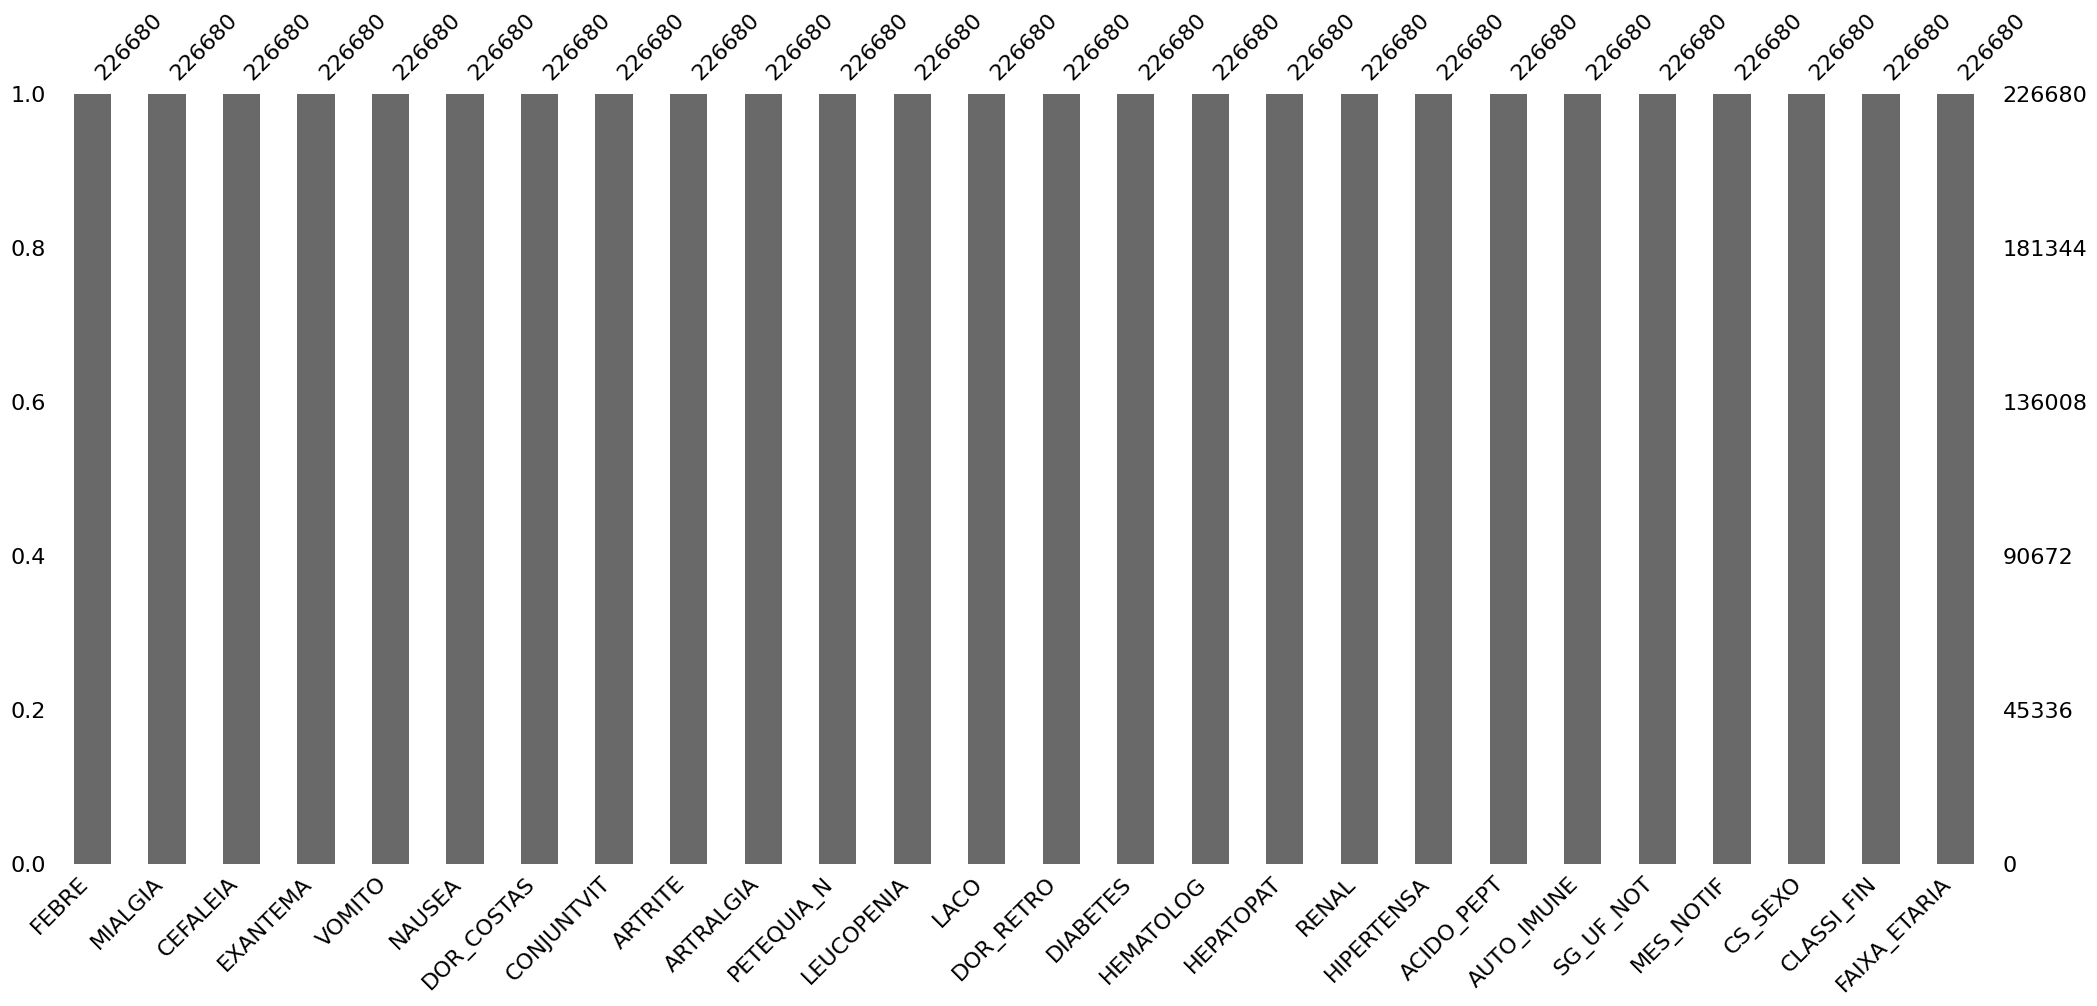

In [625]:
msno.bar(df)

### A coluna target está equilibrada? 

- 5 = Não tem chikungunya
- 13 = Tem chikungunya


Análise: A quantidade entre casos com e sem chickungunya está bem parecido

(array([1.96027991, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.78972009]),
 array([ 5.        ,  5.26666667,  5.53333333,  5.8       ,  6.06666667,
         6.33333333,  6.6       ,  6.86666667,  7.13333333,  7.4       ,
         7.66666667,  7.93333333,  8.2       ,  8.46666667,  8.73333333,
         9.        ,  9.26666667,  9.53333333,  9.8       , 10.06666667,
        10.33333333, 10.6       , 10.86666667, 11.13333333, 11.4       ,
        11.66666667, 11.93333333, 12.2       , 12.46666667, 12.73333333,
        13.        ]),
 <BarContainer object of 30 artists>)

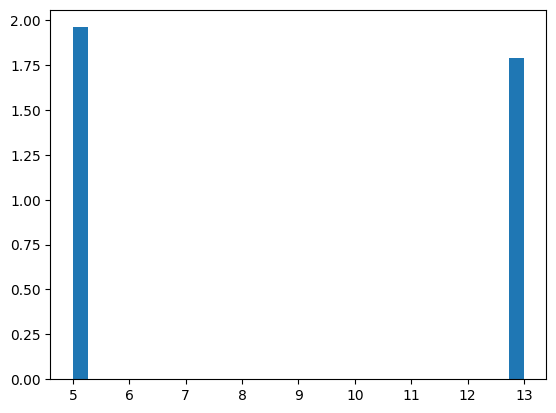

In [626]:
plt.hist(df['CLASSI_FIN'], density=True, bins=30) 

### Análise de correlação

#### Correlação entre todas as colunas

Análise:
Podemos observar uma grande correlacao entre as colunas de MUNICIPIO, UF, CRITERIO..., mas estao relacionadas em como definir a dengue no passado. 
Para saber se o paciente tem dengue atualmente, nao deveria levar em consideração a regiao. 


In [26]:
import numpy as np
df_corr_original = df_original.select_dtypes(include=[np.number]).corr()

# plt.figure(figsize=(10, 8))

# sns.heatmap(df_corr_original, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)

# plt.title('Matriz de Correlação')
# plt.show()

df_corr_original.sort_values(by='CLASSI_FIN', ascending=False)['CLASSI_FIN']

CLASSI_FIN    1.00
ALRM_HIPOT    1.00
MUNICIPIO     0.15
UF            0.14
CRITERIO      0.12
ID_MN_RESI    0.11
ID_MUNICIP    0.11
SG_UF         0.11
SG_UF_NOT     0.11
RESUL_PCR_    0.04
RESUL_VI_N    0.04
NU_IDADE_N    0.04
ID_UNIDADE    0.04
CS_RACA       0.03
VOMITO        0.03
RESUL_PRNT    0.03
CEFALEIA      0.02
CLINC_CHIK    0.02
HOSPITALIZ    0.02
RES_CHIKS2    0.01
LEUCOPENIA    0.01
NU_ANO        0.00
COUFINF       0.00
HEPATOPAT     0.00
RESUL_NS1     0.00
COMUNINF      0.00
DOR_RETRO    -0.00
RENAL        -0.00
HEMATOLOG    -0.00
COPAISINF    -0.00
ACIDO_PEPT   -0.00
AUTO_IMUNE   -0.00
CS_GESTANT   -0.01
LACO         -0.01
NAUSEA       -0.01
CONJUNTVIT   -0.03
DIABETES     -0.04
FEBRE        -0.06
HIPERTENSA   -0.06
TPAUTOCTO    -0.06
ID_REGIONA   -0.06
ID_RG_RESI   -0.06
PETEQUIA_N   -0.07
MIALGIA      -0.07
DOR_COSTAS   -0.08
CS_ESCOL_N   -0.08
IMUNOH_N     -0.09
EVOLUCAO     -0.09
RESUL_SORO   -0.10
EXANTEMA     -0.10
ANO_NASC     -0.12
SEM_NOT      -0.12
CS_FLXRET   

#### Correlação entre colunas

Análise:
Para a classi_fin as colunas estao bem distribuidas sem nenhum detaque aparente. 
Tem algumas colunas que se relacionam entre si, como Vomito e Nausea, Dor nas costas e Artrite e Diabetes e Hipertensão

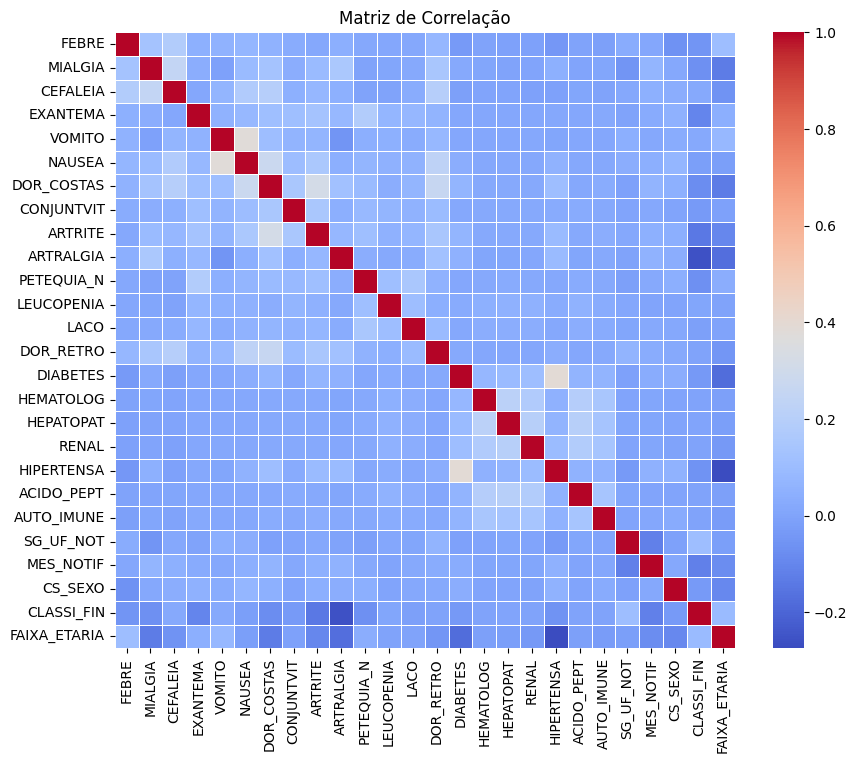

In [627]:
df_corr = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(df_corr, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)

plt.title('Matriz de Correlação')
plt.show()

In [628]:
df.corr()["CLASSI_FIN"].sort_values(ascending=False)

CLASSI_FIN      1.00
SG_UF_NOT       0.11
FAIXA_ETARIA    0.09
VOMITO          0.02
CEFALEIA        0.02
LEUCOPENIA      0.01
HEPATOPAT       0.00
RENAL          -0.00
HEMATOLOG      -0.00
DOR_RETRO      -0.00
ACIDO_PEPT     -0.00
AUTO_IMUNE     -0.00
LACO           -0.01
NAUSEA         -0.02
CONJUNTVIT     -0.03
CS_SEXO        -0.03
DIABETES       -0.04
FEBRE          -0.05
HIPERTENSA     -0.06
MIALGIA        -0.07
PETEQUIA_N     -0.07
DOR_COSTAS     -0.08
EXANTEMA       -0.10
MES_NOTIF      -0.12
ARTRITE        -0.14
ARTRALGIA      -0.26
Name: CLASSI_FIN, dtype: float64

In [629]:
# Separar linhas campo classi_fin valor 13 e 5

# Criar um dataframe que contém apenas as duas classes de interesse
df_analise = df[df["CLASSI_FIN"].isin([5.0, 13.0])]

# Agora a correlação funcionará pois existem valores diferentes (5 e 13)
correlacao = df_analise.corr()["CLASSI_FIN"].sort_values(ascending=False)
print(correlacao)

correlacao.value_counts()



CLASSI_FIN      1.00
SG_UF_NOT       0.11
FAIXA_ETARIA    0.09
VOMITO          0.02
CEFALEIA        0.02
LEUCOPENIA      0.01
HEPATOPAT       0.00
RENAL          -0.00
HEMATOLOG      -0.00
DOR_RETRO      -0.00
ACIDO_PEPT     -0.00
AUTO_IMUNE     -0.00
LACO           -0.01
NAUSEA         -0.02
CONJUNTVIT     -0.03
CS_SEXO        -0.03
DIABETES       -0.04
FEBRE          -0.05
HIPERTENSA     -0.06
MIALGIA        -0.07
PETEQUIA_N     -0.07
DOR_COSTAS     -0.08
EXANTEMA       -0.10
MES_NOTIF      -0.12
ARTRITE        -0.14
ARTRALGIA      -0.26
Name: CLASSI_FIN, dtype: float64


CLASSI_FIN
1.00     1
0.11     1
0.09     1
0.02     1
0.02     1
0.01     1
0.00     1
-0.00    1
-0.00    1
-0.00    1
-0.00    1
-0.00    1
-0.01    1
-0.02    1
-0.03    1
-0.03    1
-0.04    1
-0.05    1
-0.06    1
-0.07    1
-0.07    1
-0.08    1
-0.10    1
-0.12    1
-0.14    1
-0.26    1
Name: count, dtype: int64

In [630]:
df['TARGET'] = df['CLASSI_FIN'].map({13.0: 1, 5.0: 0})
df = df.dropna(subset=['TARGET'])

In [631]:
# Como não há uma correlação forte entre as variáveis, será utilizado o modelo de Árvore de Decisão que não depende de correlações lineares entre as variáveis.

In [632]:

# Separando as variáveis preditoras (X) da variável alvo (y)

df_regressao = df.copy()
X = df_regressao.drop(columns=['TARGET', 'CLASSI_FIN']) # Variáveis características
y = df_regressao['TARGET'] # O que eu quero prever. (Target)

## Treino modelo - LinearRegression

In [633]:
# Separando as bases em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(len(X_train), "feature de treinamento +", len(X_test), "teste")

181344 feature de treinamento + 45336 teste


In [634]:
# Criando e treinando o modelo de regressão linear
from sklearn.linear_model import LinearRegression

regressaoLinear = LinearRegression()
regressaoLinear.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
previsoes = regressaoLinear.predict(X_test)

In [635]:
# Avaliando o desempenho do modelo

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, previsoes)
mae = mean_absolute_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

RMSE: 0.21903958323869874
MAE: 0.4397185694778766
R²: 0.12230333365838442


## Treino modelo - RandomForestRegressor

In [636]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

randomForest = RandomForestRegressor()
randomForest.fit(X_train, y_train)

previsoes = randomForest.predict(X_test)

# Avaliando o desempenho do modelo

rmse = mean_squared_error(y_test, previsoes)
mae = mean_absolute_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

RMSE: 0.1898388880847702
MAE: 0.3298616441739425
R²: 0.239070336358148


In [637]:
X_train.shape

(181344, 25)

In [638]:
df.isnull().sum()

FEBRE           0
MIALGIA         0
CEFALEIA        0
EXANTEMA        0
VOMITO          0
NAUSEA          0
DOR_COSTAS      0
CONJUNTVIT      0
ARTRITE         0
ARTRALGIA       0
PETEQUIA_N      0
LEUCOPENIA      0
LACO            0
DOR_RETRO       0
DIABETES        0
HEMATOLOG       0
HEPATOPAT       0
RENAL           0
HIPERTENSA      0
ACIDO_PEPT      0
AUTO_IMUNE      0
SG_UF_NOT       0
MES_NOTIF       0
CS_SEXO         0
CLASSI_FIN      0
FAIXA_ETARIA    0
TARGET          0
dtype: int64

## Treino modelo - RandomForestClassifier

In [639]:
# Ajuste para usar algoritmo de classificação

df_classificacao = df.copy()

X_classif = df_classificacao.drop(columns=['TARGET', 'CLASSI_FIN']).astype(int)

# O y deve ser o TARGET original (0 e 1), sem o log1p
y_classif = df_classificacao['TARGET'].astype(int)

print("Tipos de dados em X:\n", X_classif.dtypes.value_counts())
print("\nTipo de dado em y:", y_classif.dtype)

Tipos de dados em X:
 int64    25
Name: count, dtype: int64

Tipo de dado em y: int64


In [640]:
from sklearn.ensemble import RandomForestClassifier

X_train_classif, X_test_classif, y_train_classif, y_test_classif = train_test_split(
    X_classif, y_classif, test_size=0.2, random_state=42, stratify=y_classif
)


randomForestClassifier = RandomForestClassifier()
randomForestClassifier.fit(X_train_classif, y_train_classif)

previsoes = randomForestClassifier.predict(X_test_classif)


In [641]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# Avaliando as métricas de Classificação
acuracia = accuracy_score(y_test_classif, previsoes)
f1 = f1_score(y_test_classif, previsoes)

print(f'Acurácia (Total de acertos): {acuracia:.4f}')
print(f'F1-Score (Equilíbrio entre precisão e busca): {f1:.4f}')

print("\n--- Matriz de Confusão ---")
# Mostra exatamente onde o modelo acertou e onde ele confundiu os diagnósticos
print(confusion_matrix(y_test, previsoes))

print("\n--- Relatório de Classificação Completo ---")
print(classification_report(y_test, previsoes))

Acurácia (Total de acertos): 0.7286
F1-Score (Equilíbrio entre precisão e busca): 0.7132

--- Matriz de Confusão ---
[[17733  5966]
 [ 6338 15299]]

--- Relatório de Classificação Completo ---
              precision    recall  f1-score   support

           0       0.74      0.75      0.74     23699
           1       0.72      0.71      0.71     21637

    accuracy                           0.73     45336
   macro avg       0.73      0.73      0.73     45336
weighted avg       0.73      0.73      0.73     45336



## Ajustando os Hiperparâmetros do RandomForestClassifier

In [642]:
randomForestClassifier = RandomForestClassifier(
    n_estimators=500,       # Mais árvores para estabilidade
    max_depth=15,           # Limita a profundidade para não decorar (overfit)
    min_samples_leaf=10,    # Garante que cada "folha" tenha dados suficientes
    class_weight='balanced',# Dá mais peso para a classe com menos dados
    random_state=42
)

randomForestClassifier.fit(X_train_classif, y_train_classif)

previsoes_hiperparametros = randomForestClassifier.predict(X_test_classif)

In [643]:
# Avaliando as métricas de Classificação
acuracia = accuracy_score(y_test_classif, previsoes_hiperparametros)
f1 = f1_score(y_test_classif, previsoes_hiperparametros)

print(f'Acurácia (Total de acertos): {acuracia:.4f}')
print(f'F1-Score (Equilíbrio entre precisão e busca): {f1:.4f}')

print("\n--- Matriz de Confusão ---")
# Mostra exatamente onde o modelo acertou e onde ele confundiu os diagnósticos
print(confusion_matrix(y_test_classif, previsoes_hiperparametros))

print("\n--- Relatório de Classificação Completo ---")
print(classification_report(y_test_classif, previsoes_hiperparametros))

Acurácia (Total de acertos): 0.7455
F1-Score (Equilíbrio entre precisão e busca): 0.7319

--- Matriz de Confusão ---
[[18045  5654]
 [ 5884 15753]]

--- Relatório de Classificação Completo ---
              precision    recall  f1-score   support

           0       0.75      0.76      0.76     23699
           1       0.74      0.73      0.73     21637

    accuracy                           0.75     45336
   macro avg       0.74      0.74      0.74     45336
weighted avg       0.75      0.75      0.75     45336



## Treino modelo - KNeighborsClassifier

In [644]:
df_kneighbors = df.copy()

X_kneighbors = df_kneighbors.drop(columns=['TARGET', 'CLASSI_FIN']).astype(int)

y_kneighbors= df_kneighbors['TARGET'].astype(int)

print("Tipos de dados em X:\n", X_kneighbors.dtypes.value_counts())
print("\nTipo de dado em y:", y_kneighbors.dtype)

Tipos de dados em X:
 int64    25
Name: count, dtype: int64

Tipo de dado em y: int64


In [645]:
from sklearn.neighbors import KNeighborsClassifier

modelo_kneighbors = KNeighborsClassifier(n_neighbors=3)

X_train_kneighbors, X_test_kneighbors, y_train_kneighbors, y_test_kneighbors = train_test_split(
    X_kneighbors, y_kneighbors, test_size=0.2, random_state=42, stratify=y_kneighbors
)

modelo_kneighbors.fit(X_train_kneighbors, y_train_kneighbors)

previsoes_kneighbors = modelo_kneighbors.predict(X_test_kneighbors)

In [646]:
# Avaliando as métricas de Classificação
acuracia = accuracy_score(y_test_kneighbors, previsoes_kneighbors)
f1 = f1_score(y_test_kneighbors, previsoes_kneighbors)

print(f'Acurácia (Total de acertos): {acuracia:.4f}')
print(f'F1-Score (Equilíbrio entre precisão e busca): {f1:.4f}')

print("\n--- Matriz de Confusão ---")
# Mostra exatamente onde o modelo acertou e onde ele confundiu os diagnósticos
print(confusion_matrix(y_test_kneighbors, previsoes_kneighbors))

print("\n--- Relatório de Classificação Completo ---")
print(classification_report(y_test_kneighbors, previsoes_kneighbors))

Acurácia (Total de acertos): 0.7097
F1-Score (Equilíbrio entre precisão e busca): 0.6938

--- Matriz de Confusão ---
[[17269  6430]
 [ 6729 14908]]

--- Relatório de Classificação Completo ---
              precision    recall  f1-score   support

           0       0.72      0.73      0.72     23699
           1       0.70      0.69      0.69     21637

    accuracy                           0.71     45336
   macro avg       0.71      0.71      0.71     45336
weighted avg       0.71      0.71      0.71     45336



## Treino modelo - XGBoost

In [647]:
df_xgboost = df.copy()

X_xgboost = df_xgboost.drop(columns=['TARGET', 'CLASSI_FIN']).astype(int)

y_xgboost= df_xgboost['TARGET'].astype(int)

print("Tipos de dados em X:\n", X_xgboost.dtypes.value_counts())
print("\nTipo de dado em y:", y_xgboost.dtype)

Tipos de dados em X:
 int64    25
Name: count, dtype: int64

Tipo de dado em y: int64


In [648]:
from xgboost import XGBClassifier

# Instale se necessário: !pip install xgboost
modelo_xgb = XGBClassifier(
    n_estimators=200, 
    learning_rate=0.05, 
    max_depth=6, 
    random_state=42
)

X_train_xgboost, X_test_xgboost, y_train_xgboost, y_test_xgboost = train_test_split(
    X_xgboost, y_xgboost, test_size=0.2, random_state=42, stratify=y_xgboost
)

modelo_xgb.fit(X_train_xgboost, y_train_xgboost)
previsoes_xgboost = modelo_xgb.predict(X_test_xgboost)

In [649]:
# Avaliando as métricas de Classificação
acuracia = accuracy_score(y_test_xgboost, previsoes_xgboost)
f1 = f1_score(y_test_xgboost, previsoes_xgboost)

print(f'Acurácia (Total de acertos): {acuracia:.4f}')
print(f'F1-Score (Equilíbrio entre precisão e busca): {f1:.4f}')

print("\n--- Matriz de Confusão ---")
# Mostra exatamente onde o modelo acertou e onde ele confundiu os diagnósticos
print(confusion_matrix(y_test_xgboost, previsoes_xgboost))

print("\n--- Relatório de Classificação Completo ---")
print(classification_report(y_test_xgboost, previsoes_xgboost))

Acurácia (Total de acertos): 0.7563
F1-Score (Equilíbrio entre precisão e busca): 0.7385

--- Matriz de Confusão ---
[[18692  5007]
 [ 6040 15597]]

--- Relatório de Classificação Completo ---
              precision    recall  f1-score   support

           0       0.76      0.79      0.77     23699
           1       0.76      0.72      0.74     21637

    accuracy                           0.76     45336
   macro avg       0.76      0.75      0.76     45336
weighted avg       0.76      0.76      0.76     45336



## Comparativo de modelos

In [650]:
## Criar uma tabela de valores dos desempenhos dos modelos testados